## Instalação e Import das bibliotecas

In [ ]:
!pip install pycaret

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from pycaret.classification import *

## Dados

In [23]:
path = '/content/drive/MyDrive/Colab Notebooks/AUTOMATED MACHINE LEARNING/Global Solutions/sipeagrofertilizante.csv'
df = pd.read_csv(path, sep=';')

In [24]:
df

,UNIDADE_DA_FEDERACAO,MUNICIPIO,NUMERO_REGISTRO_ESTABELECIMENTO,STATUS_DO_REGISTRO,CNPJ,RAZAO_SOCIAL,NOME_FANTASIA,AREA_ATUACAO,ATIVIDADE,CLASSIFICACAO
0,SC,Gaspar,SC0001201,Ativo,**.***.101/***-**,BUNGE ALIMENTOS S/A,BUNGE ALIMENTOS S/A,"FERTILIZANTE, INOCULANTE E CORRETIVO",IMPORTADOR,PRODUTO IMPORTADO EM GRANEL E COMERCIALIZADO E...
1,MG,Belo Horizonte,MG0008257,Ativo,**.***.915/***-**,CARREFOUR COMERCIO E INDUSTRIA LTDA,NaN,"FERTILIZANTE, INOCULANTE E CORRETIVO",COMERCIANTE,PRODUTO COMERCIALIZADO EMBALADO
2,SC,Tangará,SC0010669,Ativo,**.***.247/***-**,LACTICINIOS TIROL LTDA,LACTICÍNIOS TIROL LTDA,"FERTILIZANTE, INOCULANTE E CORRETIVO",COMERCIANTE,PRODUTO COMERCIALIZADO EMBALADO
3,SC,São José do Cedro,SC0006378,Ativo,**.***.247/***-**,LACTICINIOS TIROL LTDA,NaN,"FERTILIZANTE, INOCULANTE E CORRETIVO",COMERCIANTE,PRODUTO COMERCIALIZADO EMBALADO
4,SP,Guaratinguetá,SP0028231,Ativo,**.***.510/***-**,COOPERATIVA DE LATICINIOS SERRAMAR,COOPERATIVA DE LATICINIOS SERRAMAR,"FERTILIZANTE, INOCULANTE E CORRETIVO",COMERCIANTE,PRODUTO COMERCIALIZADO EMBALADO
...,...,...,...,...,...,...,...,...,...,...
9982,SP,Mauá,SP0066842,Ativo,**.***./***-**,NaN,NaN,"FERTILIZANTE, INOCULANTE E CORRETIVO",COMERCIANTE,PRODUTO COMERCIALIZADO EMBALADO
9983,GO,Uruana,GO0015180,Cancelado,**.***./***-**,NaN,NaN,"FERTILIZANTE, INOCULANTE E CORRETIVO",COMERCIANTE,PRODUTO COMERCIALIZADO EMBALADO
9984,RS,Venâncio Aires,RS0056553,Cancelado,**.***./***-**,NaN,NaN,"FERTILIZANTE, INOCULANTE E CORRETIVO",COMERCIANTE,PRODUTO COMERCIALIZADO EMBALADO
9985,SC,Pouso Redondo,RS0056553,Cancelado,**.***./***-**,NaN,NaN,"FERTILIZANTE, INOCULANTE E CORRETIVO",COMERCIANTE,PRODUTO COMERCIALIZADO EMBALADO


## Pre processamento

In [25]:
le = preprocessing.LabelEncoder()

for col in df.columns:
    if col != "STATUS_DO_REGISTRO":
        df[col] = le.fit_transform(df[col])

In [26]:
df

,UNIDADE_DA_FEDERACAO,MUNICIPIO,NUMERO_REGISTRO_ESTABELECIMENTO,STATUS_DO_REGISTRO,CNPJ,RAZAO_SOCIAL,NOME_FANTASIA,AREA_ATUACAO,ATIVIDADE,CLASSIFICACAO
0,23,610,5341,Ativo,101,1066,920,0,2,13
1,10,182,1973,Ativo,901,1238,4093,0,0,7
2,23,1647,5526,Ativo,245,3088,2458,0,0,7
3,23,1580,5471,Ativo,245,3086,4093,0,0,7
4,25,648,6642,Ativo,506,1697,1381,0,0,7
...,...,...,...,...,...,...,...,...,...,...
9982,25,996,7612,Ativo,0,5229,4093,0,0,7
9983,8,1729,1532,Cancelado,0,5229,4093,0,0,7
9984,22,1757,5265,Cancelado,0,5229,4093,0,0,7
9985,23,1306,5265,Cancelado,0,5229,4093,0,0,7


## AutoML | Pycaret
### Setup


In [27]:
s = setup(df, target = "STATUS_DO_REGISTRO", session_id = 42)

,Description,Value
0,Session id,42
1,Target,STATUS_DO_REGISTRO
2,Target type,Multiclass
3,Target mapping,"Ativo: 0, Cancelado: 1, Suspenso: 2"
4,Original data shape,"(9987, 10)"
5,Transformed data shape,"(9987, 10)"
6,Transformed train set shape,"(6990, 10)"
7,Transformed test set shape,"(2997, 10)"
8,Numeric features,9
9,Preprocess,True


In [29]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## Compare Models

In [30]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9727,0.3978,0.9727,0.9689,0.9649,0.3743,0.4469,0.1750
rf,Random Forest Classifier,0.9711,0.4059,0.9711,0.9671,0.9624,0.3260,0.4027,0.3440
lightgbm,Light Gradient Boosting Machine,0.9707,0.3941,0.9707,0.9657,0.9627,0.3362,0.4007,0.1750
et,Extra Trees Classifier,0.9674,0.3796,0.9674,0.9570,0.9581,0.2545,0.3046,0.5540
lr,Logistic Regression,0.9651,0.2727,0.9651,0.9314,0.9479,0.0000,0.0000,0.0930
ridge,Ridge Classifier,0.9651,0.0000,0.9651,0.9314,0.9479,0.0000,0.0000,0.1400
lda,Linear Discriminant Analysis,0.9651,0.2984,0.9651,0.9314,0.9479,0.0000,0.0000,0.1080
dummy,Dummy Classifier,0.9651,0.2500,0.9651,0.9314,0.9479,0.0000,0.0000,0.0890
gbc,Gradient Boosting Classifier,0.9645,0.3784,0.9645,0.9509,0.9541,0.1761,0.2154,0.3320
knn,K Neighbors Classifier,0.9621,0.3147,0.9621,0.9380,0.9472,0.0158,0.0354,0.1360


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [33]:
best_model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [35]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

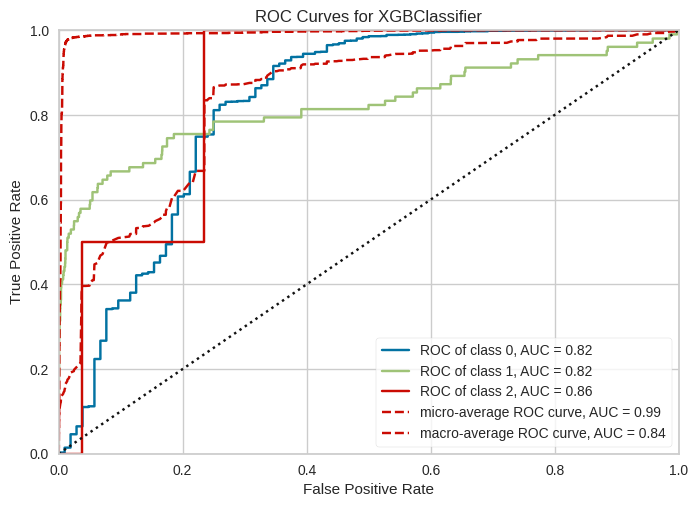

In [37]:
plot_model(best_model, plot = 'auc')

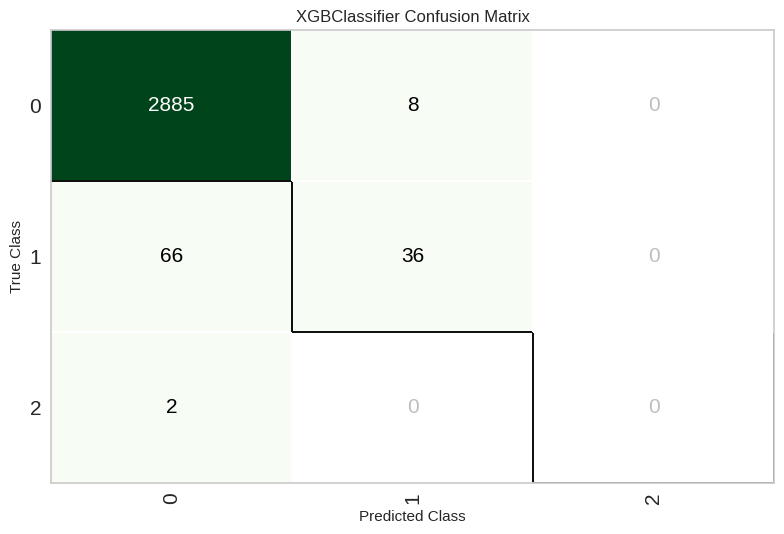

In [38]:
plot_model(best, plot = 'confusion_matrix')

In [40]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9746,0,0.9746,0.9709,0.9695,0.4758,0.5226


,UNIDADE_DA_FEDERACAO,MUNICIPIO,NUMERO_REGISTRO_ESTABELECIMENTO,CNPJ,RAZAO_SOCIAL,NOME_FANTASIA,AREA_ATUACAO,ATIVIDADE,CLASSIFICACAO,STATUS_DO_REGISTRO,prediction_label,prediction_score
2523,16,208,4019,617,2368,2044,0,0,7,0,Ativo,0.9948
7285,12,307,3404,722,194,147,0,2,13,0,Ativo,0.9996
5080,25,994,6320,775,1402,1226,0,3,4,0,Ativo,0.9903
1970,11,1372,2782,688,4844,2155,0,0,7,0,Ativo,0.9947
7018,7,925,988,138,803,644,0,0,7,0,Ativo,0.9874
...,...,...,...,...,...,...,...,...,...,...,...,...
973,25,1025,7209,383,4734,3709,0,3,4,0,Ativo,0.9839
1643,10,504,2390,85,1655,1358,0,0,7,0,Ativo,0.9985
8743,22,138,5326,709,4143,3238,0,0,7,0,Ativo,0.9988
7302,25,1515,7421,708,1996,1692,0,0,7,0,Ativo,0.9957


In [41]:
predictions = predict_model(best_model, data = df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9911,0.9498,0.9911,0.9909,0.9906,0.8527,0.8590


,UNIDADE_DA_FEDERACAO,MUNICIPIO,NUMERO_REGISTRO_ESTABELECIMENTO,CNPJ,RAZAO_SOCIAL,NOME_FANTASIA,AREA_ATUACAO,ATIVIDADE,CLASSIFICACAO,STATUS_DO_REGISTRO,prediction_label,prediction_score
0,23,610,5341,101,1066,920,0,2,13,0,Ativo,0.9995
1,10,182,1973,901,1238,4093,0,0,7,0,Ativo,0.8092
2,23,1647,5526,245,3088,2458,0,0,7,0,Ativo,0.9926
3,23,1580,5471,245,3086,4093,0,0,7,0,Ativo,0.9913
4,25,648,6642,506,1697,1381,0,0,7,0,Ativo,0.9982


In [42]:
save_model(best_model, 'modelo')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['UNIDADE_DA_FEDERACAO',
                                              'MUNICIPIO',
                                              'NUMERO_REGISTRO_ESTABELECIMENTO',
                                              'CNPJ', 'RAZAO_SOCIAL',
                                              'NOME_FANTASIA', 'AREA_ATUACAO',
                                              'ATIVID...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                             

In [43]:
tuned_model = tune_model(best_model, n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9657,0.0000,0.9657,0.9536,0.9556,0.1889,0.2380
1,0.9742,0.0000,0.9742,0.9707,0.9691,0.4597,0.5066
2,0.9728,0.0000,0.9728,0.9736,0.9641,0.3370,0.4501
3,0.9757,0.0000,0.9757,0.9738,0.9703,0.4750,0.5360
4,0.9771,0.0000,0.9771,0.9755,0.9725,0.5197,0.5727
5,0.9742,0.8008,0.9742,0.9703,0.9687,0.4604,0.5074
6,0.9671,0.8077,0.9671,0.9578,0.9587,0.2910,0.3416
7,0.9657,0.7580,0.9657,0.9543,0.9544,0.1905,0.2580
8,0.9742,0.8309,0.9742,0.9699,0.9691,0.4891,0.5329


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [44]:
tuned_model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [45]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

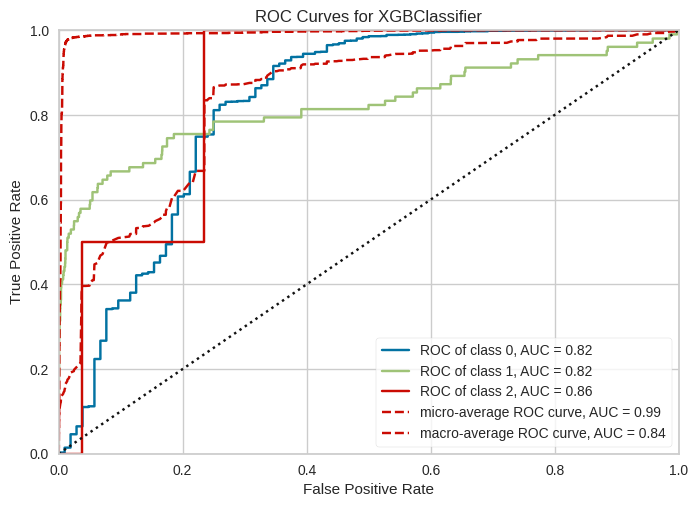

In [46]:
plot_model(tuned_model)

In [47]:
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9746,0,0.9746,0.9709,0.9695,0.4758,0.5226


,UNIDADE_DA_FEDERACAO,MUNICIPIO,NUMERO_REGISTRO_ESTABELECIMENTO,CNPJ,RAZAO_SOCIAL,NOME_FANTASIA,AREA_ATUACAO,ATIVIDADE,CLASSIFICACAO,STATUS_DO_REGISTRO,prediction_label,prediction_score
2523,16,208,4019,617,2368,2044,0,0,7,0,Ativo,0.9948
7285,12,307,3404,722,194,147,0,2,13,0,Ativo,0.9996
5080,25,994,6320,775,1402,1226,0,3,4,0,Ativo,0.9903
1970,11,1372,2782,688,4844,2155,0,0,7,0,Ativo,0.9947
7018,7,925,988,138,803,644,0,0,7,0,Ativo,0.9874
...,...,...,...,...,...,...,...,...,...,...,...,...
973,25,1025,7209,383,4734,3709,0,3,4,0,Ativo,0.9839
1643,10,504,2390,85,1655,1358,0,0,7,0,Ativo,0.9985
8743,22,138,5326,709,4143,3238,0,0,7,0,Ativo,0.9988
7302,25,1515,7421,708,1996,1692,0,0,7,0,Ativo,0.9957


In [48]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9746,0,0.9746,0.9709,0.9695,0.4758,0.5226


,UNIDADE_DA_FEDERACAO,MUNICIPIO,NUMERO_REGISTRO_ESTABELECIMENTO,CNPJ,RAZAO_SOCIAL,NOME_FANTASIA,AREA_ATUACAO,ATIVIDADE,CLASSIFICACAO,STATUS_DO_REGISTRO,prediction_label,prediction_score
2523,16,208,4019,617,2368,2044,0,0,7,0,Ativo,0.9948
7285,12,307,3404,722,194,147,0,2,13,0,Ativo,0.9996
5080,25,994,6320,775,1402,1226,0,3,4,0,Ativo,0.9903
1970,11,1372,2782,688,4844,2155,0,0,7,0,Ativo,0.9947
7018,7,925,988,138,803,644,0,0,7,0,Ativo,0.9874
...,...,...,...,...,...,...,...,...,...,...,...,...
973,25,1025,7209,383,4734,3709,0,3,4,0,Ativo,0.9839
1643,10,504,2390,85,1655,1358,0,0,7,0,Ativo,0.9985
8743,22,138,5326,709,4143,3238,0,0,7,0,Ativo,0.9988
7302,25,1515,7421,708,1996,1692,0,0,7,0,Ativo,0.9957
